<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Canalicular_excison_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Canalicular excision**

In [1]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



Fluo Values Statistics (Min, 25%, Median, 75%, Max):
                      Fluo_pre  Fluo_3M  Fluo_12M
n                        40.00     40.0      40.0
Min                       1.00      0.0       0.0
25th Percentile (Q1)      6.75      2.0       3.0
Median (Q2)               9.00      3.0       4.0
75th Percentile (Q3)     12.00      6.0       7.5
Max                      15.00     15.0      15.0


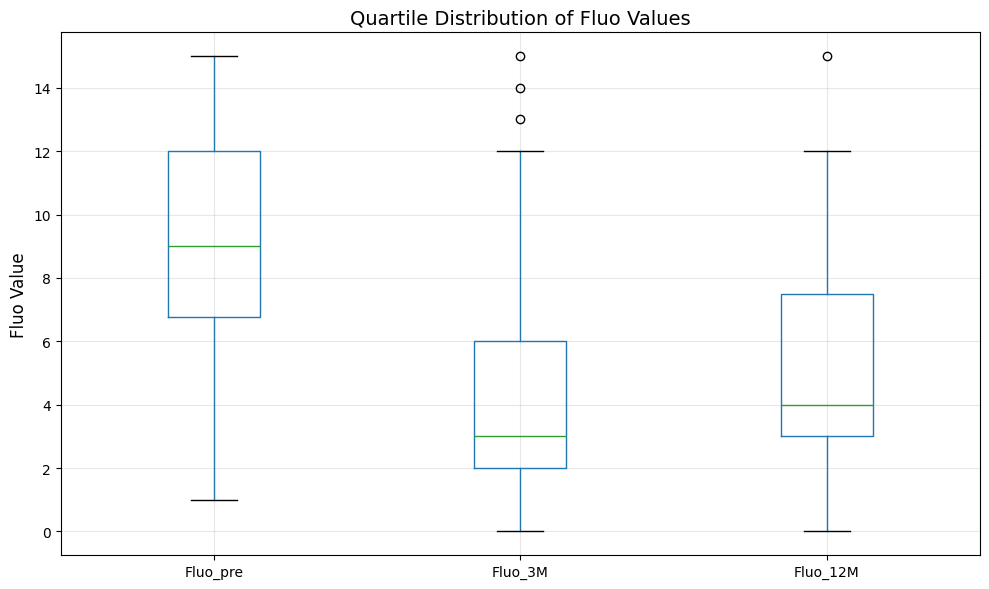

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

'''
1涙点のみの閉塞症例を除外し、Fluo値の事前測定値（Fluo_pre）および術後3か月（Fluo_3M）・12か月（Fluo_12M）
のデータについて、基本統計量（最小値、中央値、四分位点など）を計算し、ボックスプロットで可視化
'''

# Load the specific sheet to extract the data
file_path = '/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/涙小管切断術/涙小管切除術kitaguchi.xlsx'
data = pd.read_excel(file_path, sheet_name='症例_疾患')

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = False
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data

# Step 2: Extract relevant columns for Fluo data
fluo_data = filtered_data[['Fluo_pre', 'Fluo_3M', 'Fluo_12M']]

# Step 3: Calculate statistics (Min, 25%, Median, 75%, Max)
stats_table = pd.DataFrame({
    'n': fluo_data.count(),
    'Min': fluo_data.min(),
    '25th Percentile (Q1)': fluo_data.quantile(0.25),
    'Median (Q2)': fluo_data.median(),
    '75th Percentile (Q3)': fluo_data.quantile(0.75),
    'Max': fluo_data.max()
}).transpose()

# Step 4: Display the statistics
print("\nFluo Values Statistics (Min, 25%, Median, 75%, Max):")
print(stats_table)

# Step 5: Plotting boxplot to visualize the quartiles for each timepoint
plt.figure(figsize=(10, 6))
fluo_data.boxplot(column=['Fluo_pre', 'Fluo_3M', 'Fluo_12M'])

# Customizing the graph
plt.title('Quartile Distribution of Fluo Values', fontsize=14)
plt.ylabel('Fluo Value', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 6: Display the graph
plt.show()



TM Values Statistics (Min, 25%, Median, 75%, Max):
                         TM_pre      TM_3M     TM_12M
n                     40.000000  40.000000  40.000000
Min                    0.050250   0.114770   0.090000
25th Percentile (Q1)   0.095501   0.203654   0.157491
Median (Q2)            0.129426   0.285532   0.244326
75th Percentile (Q3)   0.157895   0.323455   0.329586
Max                    0.240000   0.714286   0.428571


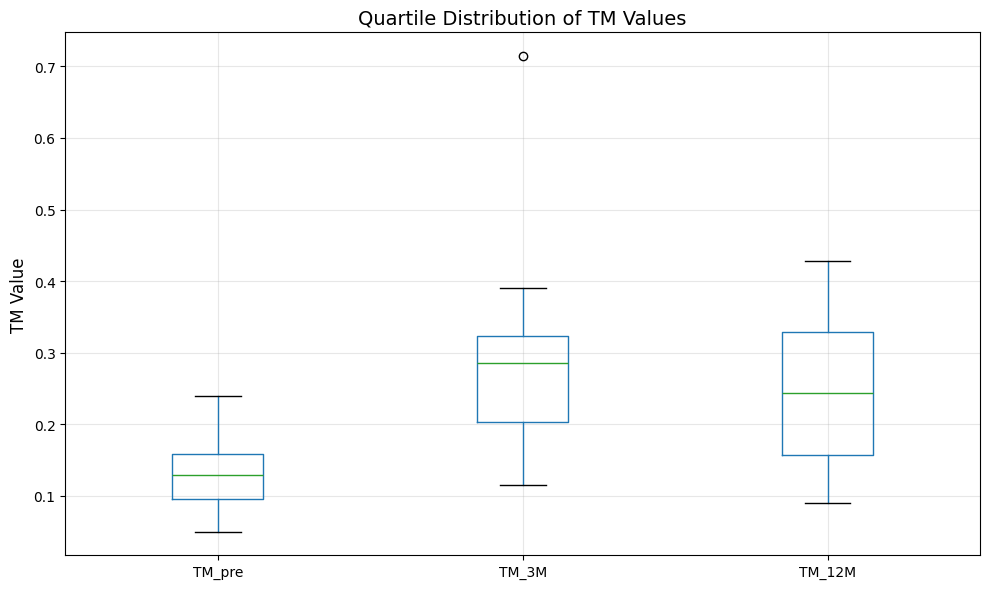

In [73]:
'''
1涙点のみの閉塞症例を除外し、TM値の事前測定値（TM_pre）および術後3か月（TM_3M）・12か月（TM_12M）
のデータについて、基本統計量（最小値、中央値、四分位点など）を計算し、ボックスプロットで可視化
'''

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = False
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data

# Step 2: Extract relevant columns for TM data
TM_data = filtered_data[['TM_pre', 'TM_3M', 'TM_12M']]

# Step 3: Calculate statistics (Min, 25%, Median, 75%, Max)
stats_table = pd.DataFrame({
    'n': TM_data.count(),
    'Min': TM_data.min(),
    '25th Percentile (Q1)': TM_data.quantile(0.25),
    'Median (Q2)': TM_data.median(),
    '75th Percentile (Q3)': TM_data.quantile(0.75),
    'Max': TM_data.max()
}).transpose()

# Step 4: Display the statistics
print("\nTM Values Statistics (Min, 25%, Median, 75%, Max):")
print(stats_table)

# Step 5: Plotting boxplot to visualize the quartiles for each timepoint
plt.figure(figsize=(10, 6))
TM_data.boxplot(column=['TM_pre', 'TM_3M', 'TM_12M'])

# Customizing the graph
plt.title('Quartile Distribution of TM Values', fontsize=14)
plt.ylabel('TM Value', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 6: Display the graph
plt.show()


In [15]:
import pandas as pd

# --- 1) TM>0.2の達成率と、達成群・非達成群それぞれでのFluo<4達成率を計算する関数を作成 ---
def calculate_tm_and_fluo_rates(data, tm_col, fluo_col, tm_threshold=0.2, fluo_threshold=4):
    """
    data      : pandas DataFrame
    tm_col    : TM値の列名（例: 'TM_3M'）
    fluo_col  : Fluo値の列名（例: 'Fluo_3M'）
    tm_threshold    : TM達成の閾値（> この値で達成とする）
    fluo_threshold  : Fluo達成の閾値（< この値で達成とする）
    """

    # 母集団(対象数)
    total_count = len(data)

    # TM>0.2達成群 / 非達成群 のデータを分ける
    tm_achieved_data = data[data[tm_col] > tm_threshold]
    tm_not_achieved_data = data[data[tm_col] <= tm_threshold]

    # --- TM>0.2達成率 ---
    tm_achieved_rate = len(tm_achieved_data) / total_count if total_count != 0 else 0

    # --- Fluo<4達成率 (達成群と非達成群それぞれで) ---
    # 達成群のFluo<4
    if len(tm_achieved_data) > 0:
        fluo_achieved_in_tm_achieved = len(tm_achieved_data[tm_achieved_data[fluo_col] < fluo_threshold])
        fluo_achieved_rate_in_tm_achieved = fluo_achieved_in_tm_achieved / len(tm_achieved_data)
    else:
        fluo_achieved_rate_in_tm_achieved = None  # 該当症例なし

    # 非達成群のFluo<4
    if len(tm_not_achieved_data) > 0:
        fluo_achieved_in_tm_not_achieved = len(tm_not_achieved_data[tm_not_achieved_data[fluo_col] < fluo_threshold])
        fluo_achieved_rate_in_tm_not_achieved = fluo_achieved_in_tm_not_achieved / len(tm_not_achieved_data)
    else:
        fluo_achieved_rate_in_tm_not_achieved = None  # 該当症例なし

    return {
        'total_count': total_count,
        'tm_achieved_count': len(tm_achieved_data),
        'tm_achieved_rate': tm_achieved_rate,
        'fluo_achieved_count_in_tm_achieved': fluo_achieved_in_tm_achieved,
        'fluo_achieved_rate_in_tm_achieved': fluo_achieved_rate_in_tm_achieved,
        'tm_not_achieved_count': len(tm_not_achieved_data),
        'fluo_achieved_count_in_tm_not_achieved': fluo_achieved_in_tm_not_achieved,
        'fluo_achieved_rate_in_tm_not_achieved': fluo_achieved_rate_in_tm_not_achieved
    }

# --- 2) 3M と 12M それぞれについて計算 ---
tm_3m_result = calculate_tm_and_fluo_rates(
    data=filtered_data,
    tm_col='TM_3M',
    fluo_col='Fluo_3M',
    tm_threshold=0.2,  # TM>0.2
    fluo_threshold=4   # Fluo<4
)

tm_12m_result = calculate_tm_and_fluo_rates(
    data=filtered_data,
    tm_col='TM_12M',
    fluo_col='Fluo_12M',
    tm_threshold=0.2,
    fluo_threshold=4
)

# --- 3) 結果をわかりやすく表示 ---
print("=== 3M結果 ===")
print(f"・総症例数: {tm_3m_result['total_count']}")
print(f"・TM>0.2 達成症例数: {tm_3m_result['tm_achieved_count']} (達成率: {tm_3m_result['tm_achieved_rate']:.2%})")
print(f"　┗ 達成群におけるFluo<4達成数: {tm_3m_result['fluo_achieved_count_in_tm_achieved']} "
      f"(達成率: {tm_3m_result['fluo_achieved_rate_in_tm_achieved']:.2%})" if tm_3m_result['fluo_achieved_rate_in_tm_achieved'] is not None else "　┗ 達成群データがありません")
print(f"・TM>0.2 非達成症例数: {tm_3m_result['tm_not_achieved_count']}")
print(f"　┗ 非達成群におけるFluo<4達成数: {tm_3m_result['fluo_achieved_count_in_tm_not_achieved']} "
      f"(達成率: {tm_3m_result['fluo_achieved_rate_in_tm_not_achieved']:.2%})" if tm_3m_result['fluo_achieved_rate_in_tm_not_achieved'] is not None else "　┗ 非達成群データがありません")

print("\n=== 12M結果 ===")
print(f"・総症例数: {tm_12m_result['total_count']}")
print(f"・TM>0.2 達成症例数: {tm_12m_result['tm_achieved_count']} (達成率: {tm_12m_result['tm_achieved_rate']:.2%})")
print(f"　┗ 達成群におけるFluo<4達成数: {tm_12m_result['fluo_achieved_count_in_tm_achieved']} "
      f"(達成率: {tm_12m_result['fluo_achieved_rate_in_tm_achieved']:.2%})" if tm_12m_result['fluo_achieved_rate_in_tm_achieved'] is not None else "　┗ 達成群データがありません")
print(f"・TM>0.2 非達成症例数: {tm_12m_result['tm_not_achieved_count']}")
print(f"　┗ 非達成群におけるFluo<4達成数: {tm_12m_result['fluo_achieved_count_in_tm_not_achieved']} "
      f"(達成率: {tm_12m_result['fluo_achieved_rate_in_tm_not_achieved']:.2%})" if tm_12m_result['fluo_achieved_rate_in_tm_not_achieved'] is not None else "　┗ 非達成群データがありません")


=== 3M結果 ===
・総症例数: 33
・TM>0.2 達成症例数: 26 (達成率: 78.79%)
　┗ 達成群におけるFluo<4達成数: 12 (達成率: 46.15%)
・TM>0.2 非達成症例数: 7
　┗ 非達成群におけるFluo<4達成数: 6 (達成率: 85.71%)

=== 12M結果 ===
・総症例数: 33
・TM>0.2 達成症例数: 21 (達成率: 63.64%)
　┗ 達成群におけるFluo<4達成数: 8 (達成率: 38.10%)
・TM>0.2 非達成症例数: 12
　┗ 非達成群におけるFluo<4達成数: 6 (達成率: 50.00%)


In [16]:
import pandas as pd

# --- 1) TM>0.2とFluo<4の達成率を計算する関数 ---
def calculate_tm_and_fluo_rates(data, tm_col, fluo_col, tm_threshold=0.2, fluo_threshold=4):
    """
    data             : pandas DataFrame
    tm_col           : TM値の列名（例: 'TM_3M'）
    fluo_col         : Fluo値の列名（例: 'Fluo_3M'）
    tm_threshold     : TM達成の閾値（> この値で達成とする）
    fluo_threshold   : Fluo達成の閾値（< この値で達成とする）
    """
    total_count = len(data)

    # TM>0.2 達成群と非達成群に分ける
    tm_achieved_data = data[data[tm_col] > tm_threshold]
    tm_not_achieved_data = data[data[tm_col] <= tm_threshold]

    tm_achieved_count = len(tm_achieved_data)
    tm_not_achieved_count = len(tm_not_achieved_data)

    tm_achieved_rate = tm_achieved_count / total_count if total_count != 0 else 0

    # 達成群の中でFluo<4の症例数と達成率
    if tm_achieved_count > 0:
        fluo_achieved_count_in_tm_achieved = len(tm_achieved_data[tm_achieved_data[fluo_col] < fluo_threshold])
        fluo_achieved_rate_in_tm_achieved = fluo_achieved_count_in_tm_achieved / tm_achieved_count
    else:
        fluo_achieved_count_in_tm_achieved = 0
        fluo_achieved_rate_in_tm_achieved = None

    # 非達成群の中でFluo<4の症例数と達成率
    if tm_not_achieved_count > 0:
        fluo_achieved_count_in_tm_not_achieved = len(tm_not_achieved_data[tm_not_achieved_data[fluo_col] < fluo_threshold])
        fluo_achieved_rate_in_tm_not_achieved = fluo_achieved_count_in_tm_not_achieved / tm_not_achieved_count
    else:
        fluo_achieved_count_in_tm_not_achieved = 0
        fluo_achieved_rate_in_tm_not_achieved = None

    return {
        'total_count': total_count,
        'tm_achieved_count': tm_achieved_count,
        'tm_achieved_rate': tm_achieved_rate,
        'fluo_achieved_count_in_tm_achieved': fluo_achieved_count_in_tm_achieved,
        'fluo_achieved_rate_in_tm_achieved': fluo_achieved_rate_in_tm_achieved,
        'tm_not_achieved_count': tm_not_achieved_count,
        'fluo_achieved_count_in_tm_not_achieved': fluo_achieved_count_in_tm_not_achieved,
        'fluo_achieved_rate_in_tm_not_achieved': fluo_achieved_rate_in_tm_not_achieved
    }

# --- 2) Backgroundごとにグループ分けして、3M, 12Mの解析を実施 ---
group_results = {}

# 各Backgroundグループごとに集計
for bg, group_df in filtered_data.groupby('Background'):
    # 3M解析
    tm_3m_result = calculate_tm_and_fluo_rates(
        data=group_df,
        tm_col='TM_3M',
        fluo_col='Fluo_3M',
        tm_threshold=0.2,
        fluo_threshold=4
    )

    # 12M解析
    tm_12m_result = calculate_tm_and_fluo_rates(
        data=group_df,
        tm_col='TM_12M',
        fluo_col='Fluo_12M',
        tm_threshold=0.2,
        fluo_threshold=4
    )

    group_results[bg] = {
        '3M': tm_3m_result,
        '12M': tm_12m_result
    }

# --- 3) 各Backgroundごとに結果を表示 ---
for bg, results in group_results.items():
    print(f"=== Background: {bg} ===")

    # 3M結果
    res_3m = results['3M']
    print("【3M結果】")
    print(f"・総症例数: {res_3m['total_count']}")
    print(f"・TM>0.2 達成症例数: {res_3m['tm_achieved_count']} (達成率: {res_3m['tm_achieved_rate']:.2%})")
    if res_3m['fluo_achieved_rate_in_tm_achieved'] is not None:
        print(f"　┗ 達成群におけるFluo<4達成数: {res_3m['fluo_achieved_count_in_tm_achieved']} "
              f"(達成率: {res_3m['fluo_achieved_rate_in_tm_achieved']:.2%})")
    else:
        print("　┗ 達成群データがありません")
    print(f"・TM>0.2 非達成症例数: {res_3m['tm_not_achieved_count']}")
    if res_3m['fluo_achieved_rate_in_tm_not_achieved'] is not None:
        print(f"　┗ 非達成群におけるFluo<4達成数: {res_3m['fluo_achieved_count_in_tm_not_achieved']} "
              f"(達成率: {res_3m['fluo_achieved_rate_in_tm_not_achieved']:.2%})")
    else:
        print("　┗ 非達成群データがありません")

    # 12M結果
    res_12m = results['12M']
    print("\n【12M結果】")
    print(f"・総症例数: {res_12m['total_count']}")
    print(f"・TM>0.2 達成症例数: {res_12m['tm_achieved_count']} (達成率: {res_12m['tm_achieved_rate']:.2%})")
    if res_12m['fluo_achieved_rate_in_tm_achieved'] is not None:
        print(f"　┗ 達成群におけるFluo<4達成数: {res_12m['fluo_achieved_count_in_tm_achieved']} "
              f"(達成率: {res_12m['fluo_achieved_rate_in_tm_achieved']:.2%})")
    else:
        print("　┗ 達成群データがありません")
    print(f"・TM>0.2 非達成症例数: {res_12m['tm_not_achieved_count']}")
    if res_12m['fluo_achieved_rate_in_tm_not_achieved'] is not None:
        print(f"　┗ 非達成群におけるFluo<4達成数: {res_12m['fluo_achieved_count_in_tm_not_achieved']} "
              f"(達成率: {res_12m['fluo_achieved_rate_in_tm_not_achieved']:.2%})")
    else:
        print("　┗ 非達成群データがありません")

    print("\n" + "-"*50 + "\n")


=== Background: GVHD ===
【3M結果】
・総症例数: 12
・TM>0.2 達成症例数: 11 (達成率: 91.67%)
　┗ 達成群におけるFluo<4達成数: 7 (達成率: 63.64%)
・TM>0.2 非達成症例数: 1
　┗ 非達成群におけるFluo<4達成数: 0 (達成率: 0.00%)

【12M結果】
・総症例数: 12
・TM>0.2 達成症例数: 5 (達成率: 41.67%)
　┗ 達成群におけるFluo<4達成数: 1 (達成率: 20.00%)
・TM>0.2 非達成症例数: 7
　┗ 非達成群におけるFluo<4達成数: 2 (達成率: 28.57%)

--------------------------------------------------

=== Background: OCP ===
【3M結果】
・総症例数: 3
・TM>0.2 達成症例数: 3 (達成率: 100.00%)
　┗ 達成群におけるFluo<4達成数: 0 (達成率: 0.00%)
・TM>0.2 非達成症例数: 0
　┗ 非達成群データがありません

【12M結果】
・総症例数: 3
・TM>0.2 達成症例数: 3 (達成率: 100.00%)
　┗ 達成群におけるFluo<4達成数: 1 (達成率: 33.33%)
・TM>0.2 非達成症例数: 0
　┗ 非達成群データがありません

--------------------------------------------------

=== Background: Others ===
【3M結果】
・総症例数: 4
・TM>0.2 達成症例数: 4 (達成率: 100.00%)
　┗ 達成群におけるFluo<4達成数: 0 (達成率: 0.00%)
・TM>0.2 非達成症例数: 0
　┗ 非達成群データがありません

【12M結果】
・総症例数: 4
・TM>0.2 達成症例数: 3 (達成率: 75.00%)
　┗ 達成群におけるFluo<4達成数: 0 (達成率: 0.00%)
・TM>0.2 非達成症例数: 1
　┗ 非達成群におけるFluo<4達成数: 1 (達成率: 100.00%)

-------------------------------

In [74]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro

'''
Fluo_12M値で患者を2つのグループ（Group1: 3以下, Group2: 3より大きい）に分け、複数の変数における統計的比較を行う。
1. 1涙点のみの閉塞症例を除外
2. Fluo_12Mを基準に2つのグループに分割
3. Mann-Whitney U検定でグループ間の差を評価
'''

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = False
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data


# Perform full analysis including sample sizes
if exclude_single_punctum == True:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M']
else:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M', 'Both_punctum']

# Create groups based on 'Fluo_12M'
group_4_or_below = filtered_data[filtered_data['Fluo_12M'] <= 3][columns_to_compare]
group_above_4 = filtered_data[filtered_data['Fluo_12M'] > 3][columns_to_compare]

# Dictionary to store results
comparison_results_full = {}

for column in columns_to_compare:
    # Extract group values
    group_1_values = group_4_or_below[column].dropna()
    group_2_values = group_above_4[column].dropna()

    # Shapiro-Wilk normality test
    _, p_value_group1 = shapiro(group_1_values)
    _, p_value_group2 = shapiro(group_2_values)

    # Mann-Whitney U test
    u_stat, mw_p_value = mannwhitneyu(group_1_values, group_2_values, alternative='two-sided')

    # Summary stats
    stats_group_1 = {
        'Count': group_1_values.count(),
        'Mean': group_1_values.mean(),
        'Median': group_1_values.median(),
        'Std': group_1_values.std(),
        '25th Percentile': group_1_values.quantile(0.25),
        '75th Percentile': group_1_values.quantile(0.75),
    }
    stats_group_2 = {
        'Count': group_2_values.count(),
        'Mean': group_2_values.mean(),
        'Median': group_2_values.median(),
        'Std': group_2_values.std(),
        '25th Percentile': group_2_values.quantile(0.25),
        '75th Percentile': group_2_values.quantile(0.75),
    }

    # Store results
    comparison_results_full[column] = {
        'Group1 Normality p-value': p_value_group1,
        'Group2 Normality p-value': p_value_group2,
        'Mann-Whitney U statistic': u_stat,
        'Mann-Whitney U p-value': mw_p_value,
        'Group 1 Stats': stats_group_1,
        'Group 2 Stats': stats_group_2,
    }

# Compile results into a DataFrame
comparison_summary_full = []

for column, results in comparison_results_full.items():
    comparison_summary_full.append({
        'Column': column,
        'Group1 Mean': results['Group 1 Stats']['Mean'],
        'Group1 Median': results['Group 1 Stats']['Median'],
        'Group1 Std': results['Group 1 Stats']['Std'],
        'Group1 Sample Size': results['Group 1 Stats']['Count'],
        'Group2 Mean': results['Group 2 Stats']['Mean'],
        'Group2 Median': results['Group 2 Stats']['Median'],
        'Group2 Std': results['Group 2 Stats']['Std'],
        'Group2 Sample Size': results['Group 2 Stats']['Count'],
        'Mann-Whitney U p-value': results['Mann-Whitney U p-value']
    })

comparison_df_full = pd.DataFrame(comparison_summary_full)

# Display the full comparison summary including sample sizes to the user
comparison_df_full

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,Column,Group1 Mean,Group1 Median,Group1 Std,Group1 Sample Size,Group2 Mean,Group2 Median,Group2 Std,Group2 Sample Size,Mann-Whitney U p-value
0,TM_pre,0.132911,0.131416,0.045696,14,0.130034,0.128583,0.044317,26,0.898330
1,TM_3M,0.258979,0.264554,0.088981,14,0.275355,0.288588,0.119942,26,0.691281
2,TM_12M,0.260434,0.232080,0.096150,14,0.244636,0.279510,0.107826,26,0.532581
3,Pre Schirmer I,2.285714,1.500000,2.233609,14,3.038462,2.500000,2.424554,26,0.244568
4,Fluo_pre,6.357143,7.500000,2.977018,14,10.461538,11.000000,3.152533,26,0.001895
5,Fluo_3M,2.857143,2.000000,3.840215,14,5.538462,4.000000,3.931725,26,0.010535
6,Both_punctum,1.000000,1.000000,0.000000,14,0.730769,1.000000,0.452344,26,0.036704


In [75]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro

'''
Fluo_12M値で患者を2つのグループ（Group1: 3以下, Group2: 3より大きい）に分け、複数の変数における統計的比較を行う。
1. 1涙点のみの閉塞症例を除外
2. Fluo_12Mを基準に2つのグループに分割
3. Mann-Whitney U検定でグループ間の差を評価
'''

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = True
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data


# Perform full analysis including sample sizes
if exclude_single_punctum == True:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M']
else:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M', 'Both_punctum']

# Create groups based on 'Fluo_12M'
group_4_or_below = filtered_data[filtered_data['Fluo_12M'] <= 3][columns_to_compare]
group_above_4 = filtered_data[filtered_data['Fluo_12M'] > 3][columns_to_compare]

# Dictionary to store results
comparison_results_full = {}

for column in columns_to_compare:
    # Extract group values
    group_1_values = group_4_or_below[column].dropna()
    group_2_values = group_above_4[column].dropna()

    # Shapiro-Wilk normality test
    _, p_value_group1 = shapiro(group_1_values)
    _, p_value_group2 = shapiro(group_2_values)

    # Mann-Whitney U test
    u_stat, mw_p_value = mannwhitneyu(group_1_values, group_2_values, alternative='two-sided')

    # Summary stats
    stats_group_1 = {
        'Count': group_1_values.count(),
        'Mean': group_1_values.mean(),
        'Median': group_1_values.median(),
        'Std': group_1_values.std(),
        '25th Percentile': group_1_values.quantile(0.25),
        '75th Percentile': group_1_values.quantile(0.75),
    }
    stats_group_2 = {
        'Count': group_2_values.count(),
        'Mean': group_2_values.mean(),
        'Median': group_2_values.median(),
        'Std': group_2_values.std(),
        '25th Percentile': group_2_values.quantile(0.25),
        '75th Percentile': group_2_values.quantile(0.75),
    }

    # Store results
    comparison_results_full[column] = {
        'Group1 Normality p-value': p_value_group1,
        'Group2 Normality p-value': p_value_group2,
        'Mann-Whitney U statistic': u_stat,
        'Mann-Whitney U p-value': mw_p_value,
        'Group 1 Stats': stats_group_1,
        'Group 2 Stats': stats_group_2,
    }

# Compile results into a DataFrame
comparison_summary_full = []

for column, results in comparison_results_full.items():
    comparison_summary_full.append({
        'Column': column,
        'Group1 Mean': results['Group 1 Stats']['Mean'],
        'Group1 Median': results['Group 1 Stats']['Median'],
        'Group1 Std': results['Group 1 Stats']['Std'],
        'Group1 Sample Size': results['Group 1 Stats']['Count'],
        'Group2 Mean': results['Group 2 Stats']['Mean'],
        'Group2 Median': results['Group 2 Stats']['Median'],
        'Group2 Std': results['Group 2 Stats']['Std'],
        'Group2 Sample Size': results['Group 2 Stats']['Count'],
        'Mann-Whitney U p-value': results['Mann-Whitney U p-value']
    })

comparison_df_full = pd.DataFrame(comparison_summary_full)

# Display the full comparison summary including sample sizes to the user
comparison_df_full

,Column,Group1 Mean,Group1 Median,Group1 Std,Group1 Sample Size,Group2 Mean,Group2 Median,Group2 Std,Group2 Sample Size,Mann-Whitney U p-value
0,TM_pre,0.132911,0.131416,0.045696,14,0.134775,0.130851,0.041870,19,0.869570
1,TM_3M,0.258979,0.264554,0.088981,14,0.303020,0.314286,0.121899,19,0.258613
2,TM_12M,0.260434,0.232080,0.096150,14,0.265925,0.288828,0.106909,19,0.884098
3,Pre Schirmer I,2.285714,1.500000,2.233609,14,3.000000,3.000000,2.134375,19,0.183285
4,Fluo_pre,6.357143,7.500000,2.977018,14,10.894737,11.000000,3.016524,19,0.000812
5,Fluo_3M,2.857143,2.000000,3.840215,14,5.894737,6.000000,4.121687,19,0.013233


In [60]:
import pandas as pd


'''
Fluo_12M値で患者を2つのグループ（Group1: 3以下, Group2: 3より大きい）に分け、疾患ごとの比較を行う。
1. 1涙点のみの閉塞症例を除外
2. Fluo_12Mを基準に2つのグループに分割
3. 疾患ごとのマトリックス表を表示
'''


# Exclude data in which only one punctum was occuluded
exclude_single_punctum = True
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data


# Create new groups after exclusion based on 'Fluo_12M'
group_below_filtered = filtered_data[filtered_data['Fluo_12M'] <= 3]
group_above_filtered = filtered_data[filtered_data['Fluo_12M'] > 3]

# Analyze distribution of 'Background' within each group
background_distribution_group_below = group_below_filtered['Background'].value_counts()
background_distribution_group_above = group_above_filtered['Background'].value_counts()

# Combine distributions into a single DataFrame for comparison
background_distribution_comparison = pd.DataFrame({
    'Group Below': background_distribution_group_below,
    'Group Above': background_distribution_group_above
}).fillna(0)

# Display the background distribution comparison
background_distribution_comparison

,Group Below,Group Above
Background,,
GVHD,3,9
OCP,1,2
Others,1,3
autoimmune,9,5


<ipython-input-68-29a27e4aafe3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Background_Group'] = filtered_data['Background'].apply(


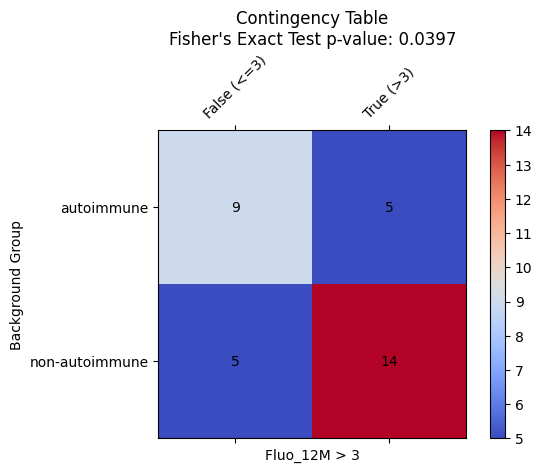

Fisher's Exact Test p-value: 0.0397
Chi-Square Test p-value: 0.0680


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
from scipy.stats import fisher_exact, chi2_contingency

'''
Autoimmune群とそれ以外群とで、カイ2乗検定
'''

# "autoimmune" と "non-autoimmune" にグループ化
filtered_data['Background_Group'] = filtered_data['Background'].apply(
    lambda x: 'autoimmune' if x == 'autoimmune' else 'non-autoimmune'
)

# コンティンジェンシーテーブルを作成
autoimmune_vs_others_table = pd.crosstab(
    filtered_data['Background_Group'], filtered_data['Fluo_12M'] > 3
)

# Fisher's Exact Test
_, fisher_p_val_autoimmune_vs_others = fisher_exact(autoimmune_vs_others_table)

# マトリックス図の作成と表示
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(autoimmune_vs_others_table.values, cmap="coolwarm")

# カラーバーを追加
plt.colorbar(cax)

# 軸ラベルの設定
ax.set_xticks(range(autoimmune_vs_others_table.shape[1]))
ax.set_yticks(range(autoimmune_vs_others_table.shape[0]))
ax.set_xticklabels(['False (<=3)', 'True (>3)'], rotation=45)
ax.set_yticklabels(autoimmune_vs_others_table.index)

# 値を表示
for i in range(autoimmune_vs_others_table.shape[0]):
    for j in range(autoimmune_vs_others_table.shape[1]):
        ax.text(j, i, autoimmune_vs_others_table.values[i, j], va='center', ha='center')

# タイトルと表示
plt.title(f"Contingency Table\nFisher's Exact Test p-value: {fisher_p_val_autoimmune_vs_others:.4f}")
plt.xlabel("Fluo_12M > 3")
plt.ylabel("Background Group")
plt.show()

# Perform Fisher's Exact Test for autoimmune vs non-autoimmune
_, fisher_p_val_autoimmune_vs_others = fisher_exact(autoimmune_vs_others_table)

# カイ二乗検定
chi2_stat, chi2_p_val, _, _ = chi2_contingency(autoimmune_vs_others_table)

# 結果表示
print(f"Fisher's Exact Test p-value: {fisher_p_val_autoimmune_vs_others:.4f}"
      if fisher_p_val_autoimmune_vs_others is not None else "Fisher's Exact Test: Not Applicable")
print(f"Chi-Square Test p-value: {chi2_p_val:.4f}")

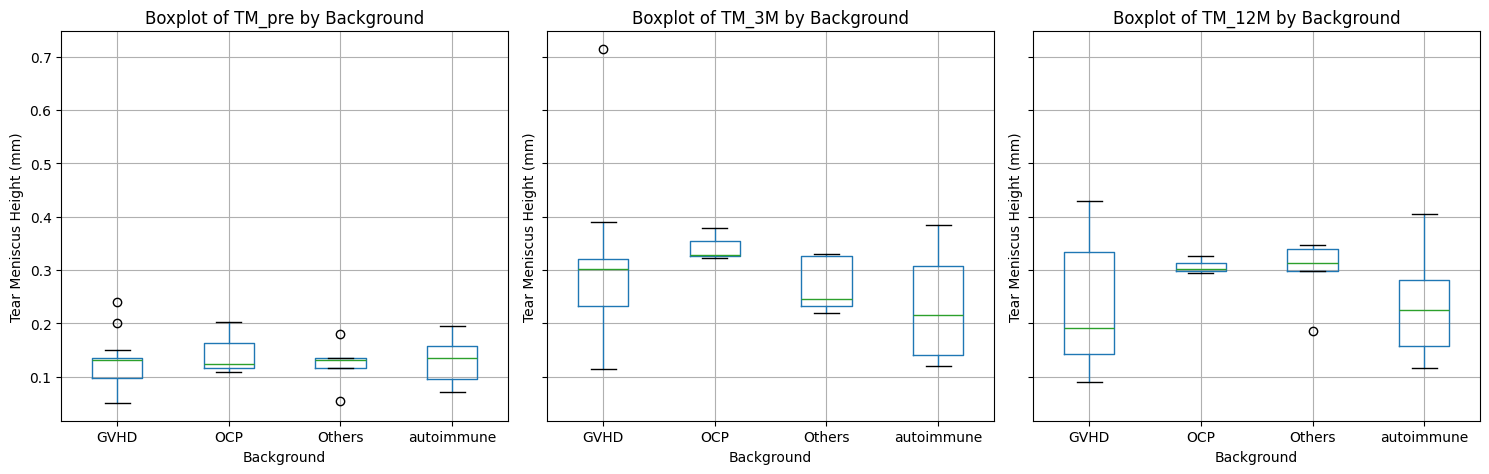

{'Time Period': ['TM_pre', 'TM_3M', 'TM_12M'],
 'H-statistic': [0.5254219069117453, 6.446730409050882, 3.36601040716701],
 'p-value': [0.9132718671722482, 0.0917871650222795, 0.33856038958880325]}

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

'''
1涙点のみの閉塞症例を除外し、Fluo値の事前測定値（Fluo_pre）および術後3か月（Fluo_3M）・12か月（Fluo_12M）
のデータについて、基本統計量（最小値、中央値、四分位点など）を計算し、ボックスプロットで可視化
'''

# Load the specific sheet to extract the data
file_path = '/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/涙小管切断術/涙小管切除術kitaguchi.xlsx'
data = pd.read_excel(file_path, sheet_name='症例_疾患')

# Extract relevant columns for analysis
data_filtered = data[['Background', 'TM_pre', 'TM_3M', 'TM_12M']].dropna()

# Perform Kruskal-Wallis test for each time period (Fluo_pre, Fluo_3M, Fluo_12M)
kruskal_pre = stats.kruskal(*[group['TM_pre'].values for _, group in data_filtered.groupby('Background')])
kruskal_3M = stats.kruskal(*[group['TM_3M'].values for _, group in data_filtered.groupby('Background')])
kruskal_12M = stats.kruskal(*[group['TM_12M'].values for _, group in data_filtered.groupby('Background')])

# Summarize Kruskal-Wallis test results
kruskal_results = {
    'Time Period': ['TM_pre', 'TM_3M', 'TM_12M'],
    'H-statistic': [kruskal_pre.statistic, kruskal_3M.statistic, kruskal_12M.statistic],
    'p-value': [kruskal_pre.pvalue, kruskal_3M.pvalue, kruskal_12M.pvalue]
}

# Visualize boxplots for each time period
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
time_points = ['TM_pre', 'TM_3M', 'TM_12M']
for i, time_point in enumerate(time_points):
    data_filtered.boxplot(column=time_point, by='Background', ax=axes[i])
    axes[i].set_title(f'Boxplot of {time_point} by Background')
    axes[i].set_xlabel('Background')
    axes[i].set_ylabel('Tear Meniscus Height (mm)')

plt.suptitle('')
plt.tight_layout()
plt.show()

kruskal_results


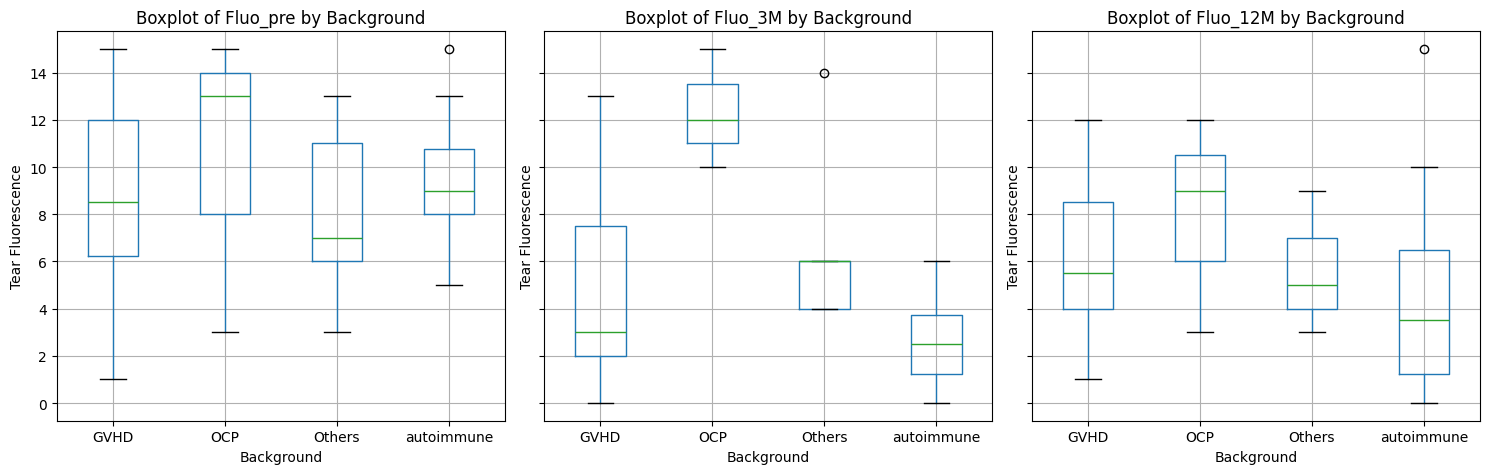

{'Time Period': ['Fluo_pre', 'Fluo_3M', 'Fluo_12M'],
 'H-statistic': [1.0045990390471748, 13.197897638331188, 3.740152893160304],
 'p-value': [0.8001391260478384, 0.004227611019932824, 0.2909245166373564]}

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

'''
1涙点のみの閉塞症例を除外し、Fluo値の事前測定値（Fluo_pre）および術後3か月（Fluo_3M）・12か月（Fluo_12M）
のデータについて、基本統計量（最小値、中央値、四分位点など）を計算し、ボックスプロットで可視化
'''

# Load the specific sheet to extract the data
file_path = '/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/涙小管切断術/涙小管切除術kitaguchi.xlsx'
data = pd.read_excel(file_path, sheet_name='症例_疾患')

# Extract relevant columns for analysis
data_filtered = data[['Background', 'Fluo_pre', 'Fluo_3M', 'Fluo_12M']].dropna()

# Perform Kruskal-Wallis test for each time period (Fluo_pre, Fluo_3M, Fluo_12M)
kruskal_pre = stats.kruskal(*[group['Fluo_pre'].values for _, group in data_filtered.groupby('Background')])
kruskal_3M = stats.kruskal(*[group['Fluo_3M'].values for _, group in data_filtered.groupby('Background')])
kruskal_12M = stats.kruskal(*[group['Fluo_12M'].values for _, group in data_filtered.groupby('Background')])

# Summarize Kruskal-Wallis test results
kruskal_results = {
    'Time Period': ['Fluo_pre', 'Fluo_3M', 'Fluo_12M'],
    'H-statistic': [kruskal_pre.statistic, kruskal_3M.statistic, kruskal_12M.statistic],
    'p-value': [kruskal_pre.pvalue, kruskal_3M.pvalue, kruskal_12M.pvalue]
}

# Visualize boxplots for each time period
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
time_points = ['Fluo_pre', 'Fluo_3M', 'Fluo_12M']
for i, time_point in enumerate(time_points):
    data_filtered.boxplot(column=time_point, by='Background', ax=axes[i])
    axes[i].set_title(f'Boxplot of {time_point} by Background')
    axes[i].set_xlabel('Background')
    axes[i].set_ylabel('Tear Fluorescence')

plt.suptitle('')
plt.tight_layout()
plt.show()

kruskal_results


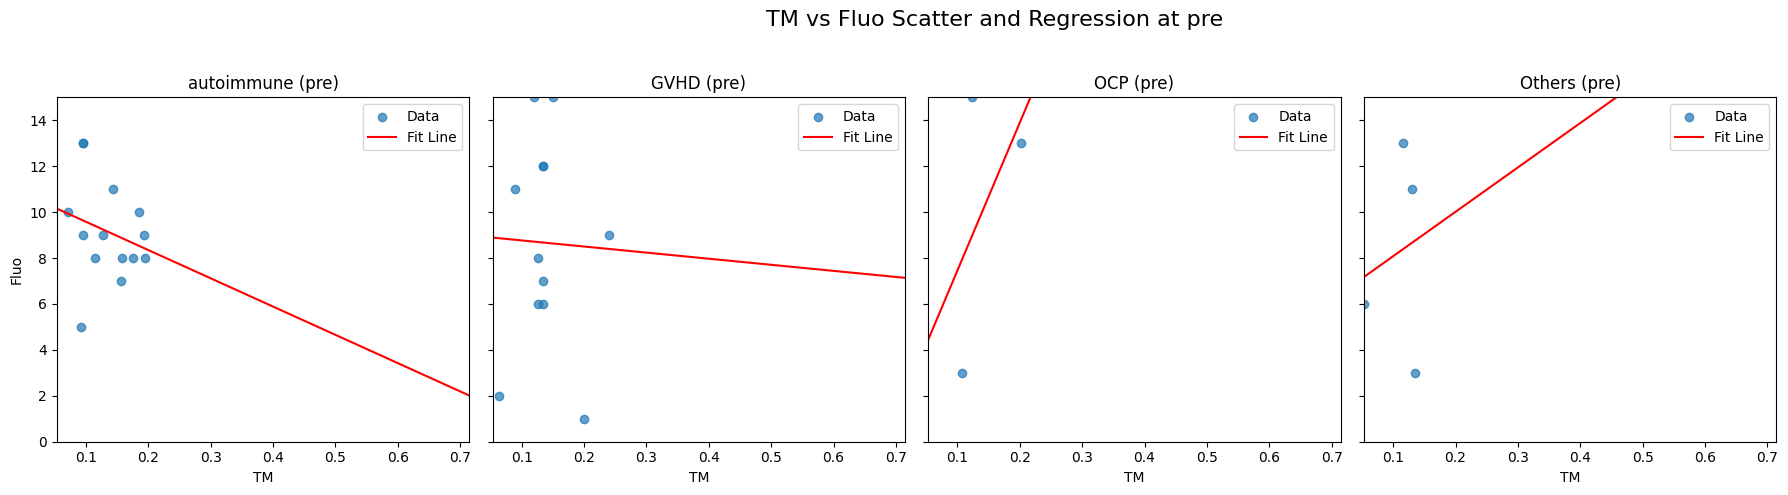

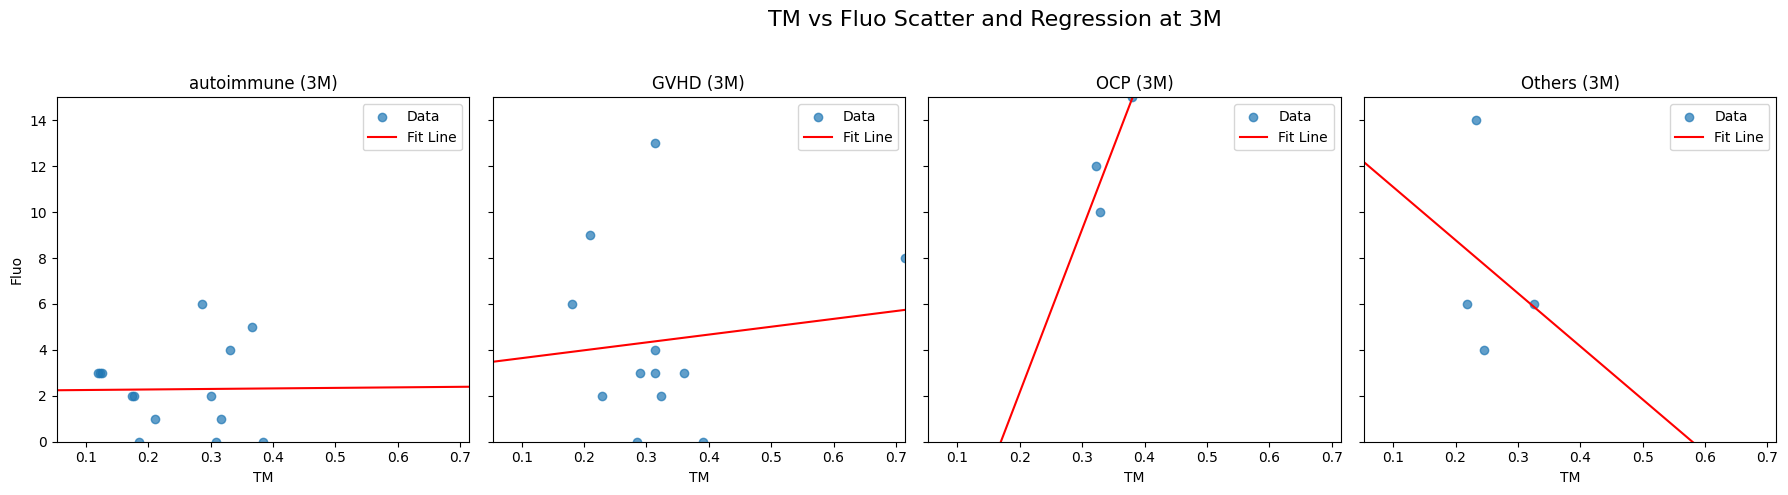

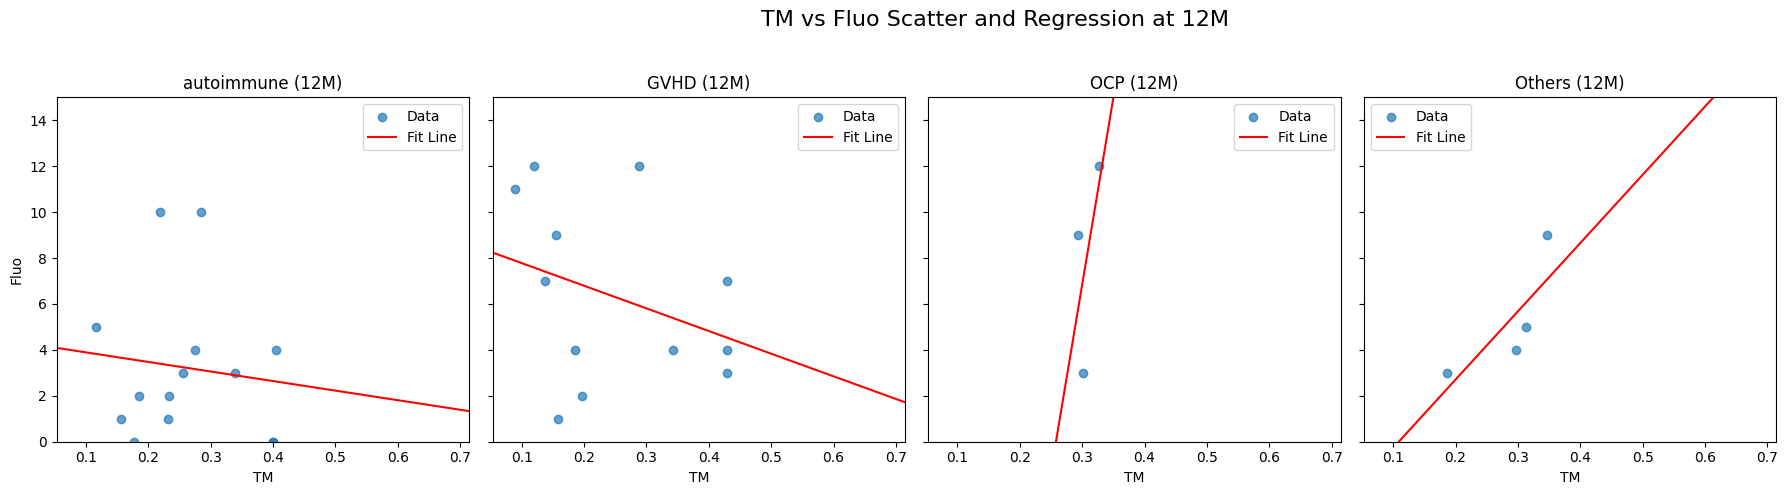

Correlation and Regression Analysis Results:
   TimePoint  Background  Pearson_r  Pearson_p  Spearman_r  Spearman_p  \
0        pre  autoimmune  -0.239304   0.409947   -0.201375    0.489974   
1        pre        GVHD  -0.026563   0.934690    0.032261    0.920717   
2        pre         OCP   0.506659   0.661760    0.500000    0.666667   
3        pre      Others   0.159651   0.840349   -0.400000    0.600000   
4         3M  autoimmune   0.011665   0.968431   -0.158322    0.588793   
5         3M        GVHD   0.119494   0.711459   -0.138791    0.667066   
6         3M         OCP   0.879152   0.316219    0.500000    0.666667   
7         3M      Others  -0.251680   0.748320   -0.316228    0.683772   
8        12M  autoimmune  -0.119023   0.685280   -0.028890    0.921902   
9        12M        GVHD  -0.327039   0.299452   -0.419931    0.174121   
10       12M         OCP   0.612227   0.580548    0.500000    0.666667   
11       12M      Others   0.784683   0.215317    1.000000    0.000

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = True
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data

# -----------------------------
# 1. 可視化による初期検討
# 散布図と回帰線で各群のTMとFluoの関係を直感的に把握
# -----------------------------

# 対象の時点と対応するカラム名（pre, 3M, 12M）
time_points = [
    ('TM_pre', 'Fluo_pre', 'pre'),
    ('TM_3M', 'Fluo_3M', '3M'),
    ('TM_12M', 'Fluo_12M', '12M')
]

# 全体の軸範囲を統一するため、各カラムの最小・最大を取得（NaNは除外）
tm_cols = ['TM_pre', 'TM_3M', 'TM_12M']
fluo_cols = ['Fluo_pre', 'Fluo_3M', 'Fluo_12M']
x_limits = (filtered_data[tm_cols].min().min(), filtered_data[tm_cols].max().max())
y_limits = (filtered_data[fluo_cols].min().min(), filtered_data[fluo_cols].max().max())

# 疾患（Background）のユニークなグループを取得
background_groups = filtered_data['Background'].dropna().unique()

# 各時点ごとに、疾患別に散布図と回帰直線をプロット
for tm_col, fluo_col, label in time_points:
    fig, axes = plt.subplots(1, len(background_groups), figsize=(5 * len(background_groups), 5), sharex=True, sharey=True)
    if len(background_groups) == 1:
        axes = [axes]  # グループが1つの場合もリストに変換
    for ax, bg in zip(axes, background_groups):
        subset = filtered_data[filtered_data['Background'] == bg].dropna(subset=[tm_col, fluo_col])
        ax.scatter(subset[tm_col], subset[fluo_col], alpha=0.7, label='Data')

        # データ数が十分なら線形回帰の近似線を追加
        if len(subset) > 1:
            coeffs = np.polyfit(subset[tm_col], subset[fluo_col], 1)
            x_vals = np.linspace(x_limits[0], x_limits[1], 100)
            y_vals = coeffs[0] * x_vals + coeffs[1]
            ax.plot(x_vals, y_vals, color='red', label='Fit Line')

        ax.set_title(f'{bg} ({label})')
        ax.set_xlabel('TM')
        ax.set_xlim(x_limits)
        ax.set_ylim(y_limits)
        ax.legend()
    axes[0].set_ylabel('Fluo')
    plt.suptitle(f'TM vs Fluo Scatter and Regression at {label}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()

# -----------------------------
# 2. 相関・回帰分析による定量評価
# 疾患別に相関係数と回帰係数を算出し、群間の違いを評価
# -----------------------------

# 結果を保存するリスト
results = []

# 対象時点ごとに解析
for tm_col, fluo_col, label in time_points:
    for bg in background_groups:
        subset = filtered_data[filtered_data['Background'] == bg].dropna(subset=[tm_col, fluo_col])
        if len(subset) > 1:
            # Pearson, Spearman相関係数
            pearson_r, pearson_p = stats.pearsonr(subset[tm_col], subset[fluo_col])
            spearman_r, spearman_p = stats.spearmanr(subset[tm_col], subset[fluo_col])
            # 線形回帰（numpy polyfit）
            coeffs = np.polyfit(subset[tm_col], subset[fluo_col], 1)
            slope = coeffs[0]
            intercept = coeffs[1]
            results.append({
                'TimePoint': label,
                'Background': bg,
                'Pearson_r': pearson_r,
                'Pearson_p': pearson_p,
                'Spearman_r': spearman_r,
                'Spearman_p': spearman_p,
                'Regression_Slope': slope,
                'Regression_Intercept': intercept,
                'N': len(subset)
            })
        else:
            results.append({
                'TimePoint': label,
                'Background': bg,
                'Pearson_r': np.nan,
                'Pearson_p': np.nan,
                'Spearman_r': np.nan,
                'Spearman_p': np.nan,
                'Regression_Slope': np.nan,
                'Regression_Intercept': np.nan,
                'N': len(subset)
            })

# 表示用にDataFrameに変換
corr_reg_results = pd.DataFrame(results)
print("Correlation and Regression Analysis Results:")
print(corr_reg_results)

# -----------------------------
# 3. ANCOVAによる統計的検定
# 共変量（TM）を取り入れて、疾患群間でFluo改善に差があるかを検定
# -----------------------------

# ANCOVAでは、各時点ごとにモデルを構築（交互作用項TM:Backgroundで傾きの差を検証）
ancova_results = {}

for tm_col, fluo_col, label in time_points:
    # データのNaN除去
    df = data[['Background', tm_col, fluo_col]].dropna()
    # 変数名を簡略化して扱いやすくする
    df = df.rename(columns={tm_col: 'TM', fluo_col: 'Fluo'})
    # モデル式：Fluo ~ TM * Background（交互作用項含む）
    model = smf.ols('Fluo ~ TM * Background', data=df).fit()
    ancova_table = sm.stats.anova_lm(model, typ=2)
    ancova_results[label] = ancova_table
    print(f"\nANCOVA results for {label}:")
    print(ancova_table)


In [13]:
# Fit Lineの傾きが有意か検定する
slope_significance_results = []

for tm_col, fluo_col, label in time_points:
    for bg in background_groups:
        subset = filtered_data[filtered_data['Background'] == bg].dropna(subset=[tm_col, fluo_col])
        if len(subset) > 1:
            # OLSモデルを構築
            df_subset = subset[[tm_col, fluo_col]].rename(columns={tm_col: 'TM', fluo_col: 'Fluo'})
            ols_model = smf.ols('Fluo ~ TM', data=df_subset).fit()
            # 傾きのp値を取得
            slope_pvalue = ols_model.pvalues['TM']
            slope = ols_model.params['TM']
            intercept = ols_model.params['Intercept']
            slope_significance_results.append({
                'TimePoint': label,
                'Background': bg,
                'Slope': slope,
                'Intercept': intercept,
                'P_value': slope_pvalue,
                'N': len(subset)
            })
        else:
            slope_significance_results.append({
                'TimePoint': label,
                'Background': bg,
                'Slope': np.nan,
                'Intercept': np.nan,
                'P_value': np.nan,
                'N': len(subset)
            })

# 傾き検定結果をDataFrameにまとめる
slope_significance_df = pd.DataFrame(slope_significance_results)
print("Fit Line Slope Significance Results:")
print(slope_significance_df)


Fit Line Slope Significance Results:
   TimePoint  Background       Slope  Intercept   P_value   N
0        pre  autoimmune  -12.315145  10.811717  0.409947  14
1        pre        GVHD   -2.652420   9.032505  0.934690  12
2        pre         OCP   64.411785   1.014911  0.661760   3
3        pre      Others   19.338053   6.146187  0.840349   4
4         3M  autoimmune    0.230854   2.229511  0.968431  14
5         3M        GVHD    3.420980   3.298252  0.711459  12
6         3M         OCP   71.040349 -12.053798  0.316219   3
7         3M      Others  -23.134292  13.408844  0.748320   4
8        12M  autoimmune   -4.165766   4.308026  0.685280  14
9        12M        GVHD   -9.862849   8.765601  0.299452  12
10       12M         OCP  162.846685 -42.013980  0.580548   3
11       12M      Others   29.739086  -3.242072  0.215317   4
